In [83]:
import numpy as np
import plotly.graph_objects as go

imu_data = np.loadtxt("/home/nuci7/project/cf2/crazyflie-firmware/control/data/imu_data_1102-1545_00d.csv", delimiter=',')

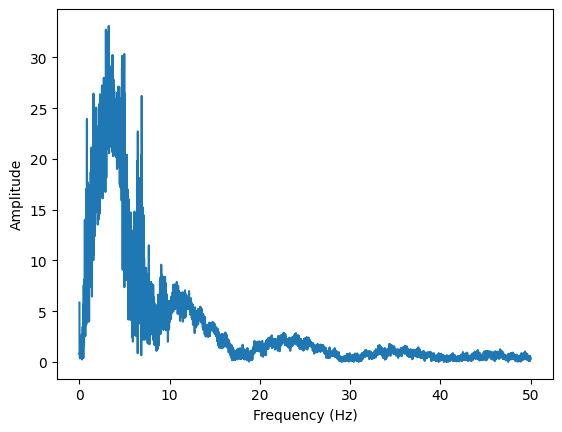

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = imu_data[:,0]
fft_result = np.fft.fft(data)
amplitude_spectrum = 2.0 / len(data) * np.abs(fft_result[:len(data)//2])
sampling_rate = 100
freq = np.arange(len(data)) * (sampling_rate / len(data))
plt.plot(freq[:len(data)//2], amplitude_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

In [84]:
import scipy.signal as signal_p

# Define filter parameters
fs = 100  # Sampling frequency
fc = 4  # Cutoff frequency
order = 6  # Filter order



# Create low-pass Butterworth filter
b, a = signal_p.butter(order, fc / (fs / 2), btype='low')

# Apply filter to signal data
signalf = signal_p.filtfilt(b, a, imu_data[:,:6], axis=0)
timestamp = imu_data[:,7]
fig = go.Figure()
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,3],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aX'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,4],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aY'))
fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,5],
                    mode='lines',
                    line=dict(width=0.5),
                    name='aZ'))

fig.add_trace(go.Scatter(x=timestamp, y=imu_data[:,8]/1000,
                    mode='lines',
                    line=dict(width=0.5),
                    name='zrange'))


# # Add a rectangle to the plot
# fig.add_shape(type='rect',
#               x0=0,
#               y0=-2,
#               x1=10,
#               y1=2,
#               line=dict(color='blue', width=0.5),
#             #   fillcolor='lightblue',
#               opacity=0.5)

fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=timestamp[-1].astype(float),
                y1=0,
                line=dict(color='black', width=0.5),
            #   fillcolor='lightblue',
                opacity=1)

    
    


fig.update_layout(xaxis_title='timestamps s',
                        yaxis_title='Amplitude m/s2',
                        font=dict(size=25, family='Arial', color='rgb(0, 0, 0)'),
                        margin={'l': 15, 'r': 15, 't': 15, 'b': 15},
                        # width=1000, height=400,
                        legend=dict(
                            yanchor="top",
                            y=1.2,
                            xanchor="left",
                            x = 0.25,
                            font=dict(
                                family='Arial',
                                size=25,
                                color='rgb(0, 0, 0)',
                            ),
                            orientation="h",
                            # bordercolor="Black",
                            # borderwidth=1
                        ),
                        plot_bgcolor='rgb(255,255,255)',
                        xaxis=dict(
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tick0 = 150,
                            dtick = 10,
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
                        yaxis=dict(
                            # range = [0, 1],
                            showline=True,
                            linecolor='rgb(0, 0, 0)',
                            linewidth=2,
                            ticks='inside',
                            tickfont=dict(
                                family='Arial',
                                size=20,
                                color='rgb(0, 0, 0)',
                            ),
                            tickformat='.2f',   # y轴刻度分辨率
                            gridcolor='rgb(245, 245, 245)',
                            mirror=True
                        ),
        )

fig.show()

In [82]:
on45 = imu_data[2370:2570,:]
np.savetxt('/home/nuci7/project/cf2/crazyflie-firmware/control/train_data/on00_13.txt', on45)

In [41]:
def quatdecompress(comp):
    q = np.zeros(4)
    mask = (1 << 9) - 1
    i_largest = comp >> 30
    sum_squares = 0
    for i in range(3, -1, -1):
        if i != i_largest:
            mag = comp & mask
            negbit = (comp >> 9) & 0x1
            comp = comp >> 10
            q[i] = mag / mask / np.sqrt(2)
            if negbit == 1:
                q[i] = -q[i]
            sum_squares += q[i] * q[i]
    q[i_largest] = np.sqrt(1.0 - sum_squares)
    return q

q = quatdecompress(3463829145)